Red Light Violation Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns

In [2]:
# Get csv files
# Chicago data
chicago_daycount_path = "../Chicago/Chicago_DayCountAll.csv"
chicago_hourcount_path  = "../Chicago/Chicago_HourCount.csv"
chicago_moutncount_path = "../Chicago/Chicago_MonthCount.csv"

chicago_daycount_df = pd.read_csv(chicago_daycount_path)
chicago_hourcount_df = pd.read_csv(chicago_hourcount_path)
chicago_monthcount_df = pd.read_csv(chicago_moutncount_path)

In [3]:
# New York data
new_york_daycount_path = "../NY Red Light Violation/New_York_DayCount.csv"
new_york_hourcount_path = "../NY Red Light Violation/New_York_HourCount.csv"
new_york_monthcount_path = "../NY Red Light Violation/New_York_MonthCount.csv"

new_york_daycount_df = pd.read_csv(new_york_daycount_path)
new_york_hourcount_df = pd.read_csv(new_york_hourcount_path)
new_york_monthcount_df = pd.read_csv(new_york_monthcount_path)
new_york_daycount_df = new_york_daycount_df.rename(columns={'State':'Daily Count'})

In [4]:
new_orleans_daycount_path = "../NOLA/NOLA_by_day.csv"
new_orleans_hourcount_path = "../NOLA/NOLA_by_hour.csv"
new_orleans_monthcount_path = "../NOLA/NOLA_by_month.csv"

new_orleans_daycount_df = pd.read_csv(new_orleans_daycount_path)
new_orleans_hourcount_df = pd.read_csv(new_orleans_hourcount_path)
new_orleans_monthcount_df = pd.read_csv(new_orleans_monthcount_path)

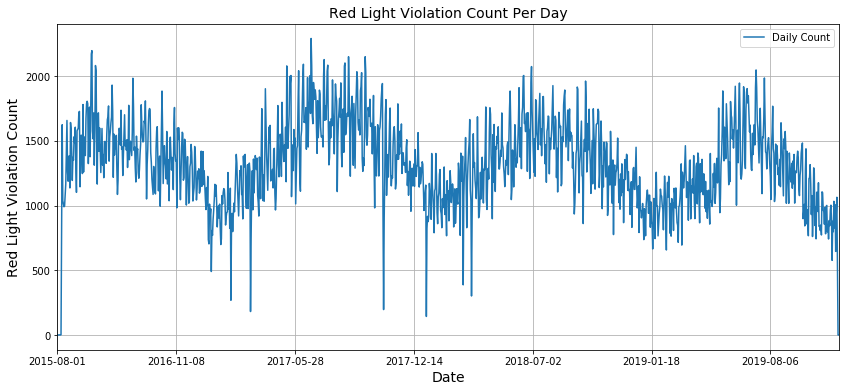

In [7]:
# plot data
# 1. Violation Per Day
new_york_daycount_df2 = new_york_daycount_df.set_index('Issue Date')
new_york_daycount_df2.plot(kind="line", figsize=(14,6), label='New York')
# set labels and sticks
plt.title("Red Light Violation Count Per Day", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Red Light Violation Count", fontsize=14)

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Daily_Count_NY.png")
# Show plot
plt.show()

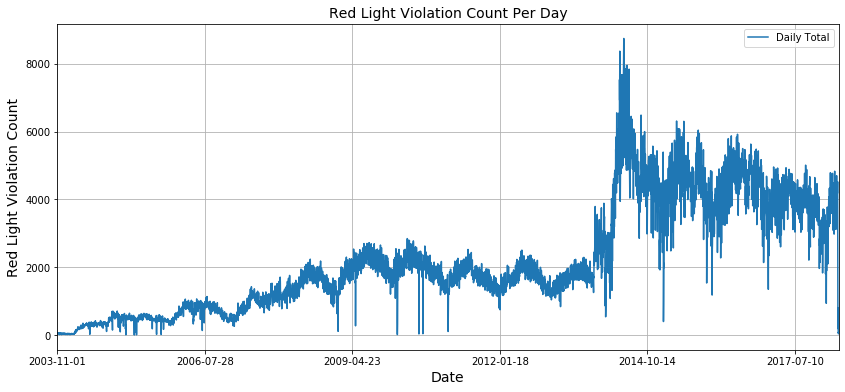

In [8]:
chicago_daycount_df2 = chicago_daycount_df.set_index('date')
chicago_daycount_df2.plot(kind="line", figsize=(14,6), label='New York')
# set labels and sticks
plt.title("Red Light Violation Count Per Day", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Red Light Violation Count", fontsize=14)

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Daily_Count_Chicago.png")
# Show plot
plt.show()

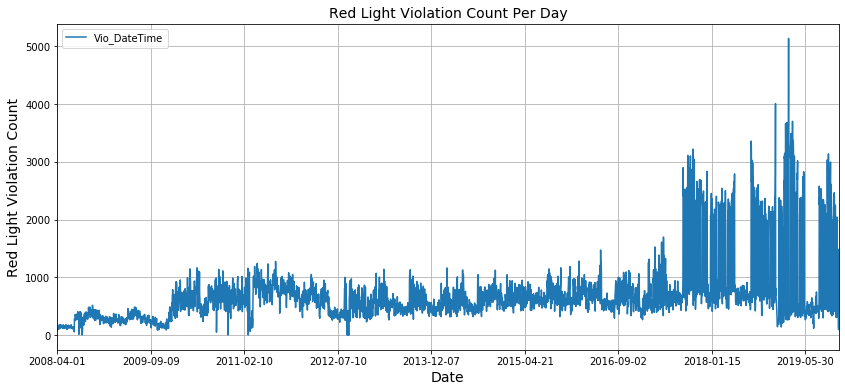

In [9]:
new_orleans_daycount_df2 = new_orleans_daycount_df.set_index('date')
new_orleans_daycount_df2.plot(kind="line", figsize=(14,6), label='New York')
# set labels and sticks
plt.title("Red Light Violation Count Per Day", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Red Light Violation Count", fontsize=14)

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Daily_Count_New_Orleans.png")
# Show plot
plt.show()

In [9]:
new_orleans_daycount_df_3 = new_orleans_daycount_df.copy()
new_orleans_daycount_df_3["year"] = [x[:4] for x in new_orleans_daycount_df_3['date']]
# new_orleans_daycount_df_3.dtypes
new_orleans_daycount_df_3["year"] = pd.to_numeric(new_orleans_daycount_df_3["year"])

new_orleans_daycount_df_3 = new_orleans_daycount_df_3.loc[new_orleans_daycount_df_3['year'] < 2017, :]
new_orleans_daycount_df_3.count()

date            3121
Vio_DateTime    3121
year            3121
dtype: int64

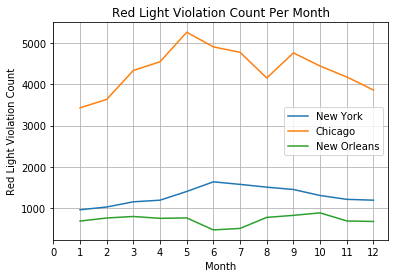

In [65]:
# plot data
# 2. Violation Per Month (however, the plot shows the average per day)
x_month = new_york_monthcount_df['Month']
y_month1 = new_york_monthcount_df['Average Count']
y_month2 = chicago_monthcount_df['Daily Avg']
# considering the stating month new_orleans_monthcount_df.min() and the ending month new_orleans_monthcount_df.max()
month_count_list = [11,11,11,11,12,12,12,12,12,12,12,11]
y_month3 = (new_orleans_monthcount_df['Vio_DateTime']/month_count_list)/31

plt.plot(x_month, y_month1, label='New York')
plt.plot(x_month, y_month2, label='Chicago')
plt.plot(x_month, y_month3, label='New Orleans')
# set labels and sticks
plt.title("Red Light Violation Count Per Month")
plt.xlabel("Month")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,13))

# plt.style.use('seaborn-bright')
plt.legend(loc='best')
plt.grid()
plt.savefig("MonthlyCount.png")
# Show plot
plt.show()

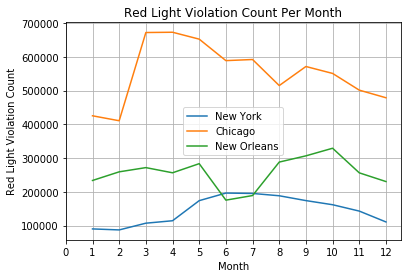

In [66]:
x_month = new_york_monthcount_df['Month']
y_month11 = new_york_monthcount_df['Total']
y_month22 = chicago_monthcount_df['Total']
y_month33 = new_orleans_monthcount_df['Vio_DateTime']

plt.plot(x_month, y_month11, label='New York')
plt.plot(x_month, y_month22, label='Chicago')
plt.plot(x_month, y_month33, label='New Orleans')
# set labels and sticks
plt.title("Red Light Violation Count Per Month")
plt.xlabel("Month")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,13))

# plt.style.use('seaborn-bright')
plt.legend(loc='best')
plt.grid()
plt.savefig("MonthlyCount_2.png")
# Show plot
plt.show()

In [ ]:
# modified the data
new_orleans_hourcount_path2 = "../NOLA/new_orleans_hourcount2.csv"
new_orleans_hourcount_df2 = pd.read_csv(new_orleans_hourcount_path2)
new_orleans_hourcount_df2

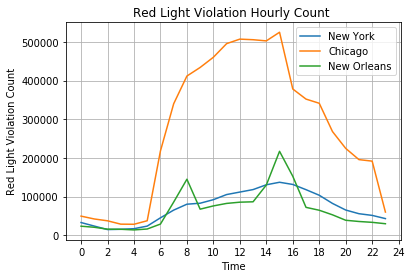

In [11]:
# plot data
# 3. Violation Per Hour
x_hour = new_york_hourcount_df['Hour']
y_hour1 = new_york_hourcount_df['Total']
y_hour2 = chicago_hourcount_df['Total']
y_hour3 = new_orleans_hourcount_df2['date']
plt.plot(x_hour, y_hour1, label='New York')
plt.plot(x_hour, y_hour2, label='Chicago')
plt.plot(x_hour, y_hour3, label='New Orleans')
# set labels and sticks
plt.title("Red Light Violation Hourly Count ")
plt.xlabel("Time")
plt.ylabel("Red Light Violation Count")
plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("HourCount.png")
# Show plot
plt.show()

Section 2 : Violation Count vs Tempurature

In [20]:
# Read the temp csv file
temp_path = "../NOAAdata/daily_weather.csv"
daily_weather_df = pd.read_csv(temp_path)
daily_weather_df.head()

chicago_daycount_df2 = pd.read_csv("../Chicago/Chicago_DayCount.csv")
chicago_daycount_df2.head()

,date,Daily Total
0,2014-03-01,3234
1,2014-03-02,2861
2,2014-03-03,3679
3,2014-03-04,4195
4,2014-03-05,3191


In [21]:
# Select the weather data for New York
new_york_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'New York'), :]
new_york_daily_weather.head()

# Select the weather data for Chicago
chicago_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'Chicago'), :]
chicago_daily_weather.head()

# Select the weather data for New Orleans
new_orleans_daily_weather = daily_weather_df.loc[(daily_weather_df['city'] == 'New Orleans'), :]
new_orleans_daily_weather.head()

,station,date,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,GHCND:USW00012916,2010-01-01,0.0,NaN,NaN,54.0,42.0,New Orleans
1,GHCND:USW00012916,2010-01-02,0.0,NaN,NaN,51.0,39.0,New Orleans
2,GHCND:USW00012916,2010-01-03,0.0,NaN,NaN,47.0,37.0,New Orleans
3,GHCND:USW00012916,2010-01-04,0.0,NaN,NaN,43.0,30.0,New Orleans
4,GHCND:USW00012916,2010-01-05,0.0,NaN,NaN,43.0,28.0,New Orleans


In [22]:
# combine dataframes
new_york_daycount_df = new_york_daycount_df.rename(columns={'Issue Date':'date'})
combined_data_NY = pd.merge(new_york_daycount_df, new_york_daily_weather, on="date", how="outer")
combined_data_NY.count()

combined_data_CHI = pd.merge(chicago_daycount_df2, chicago_daily_weather, on="date", how="outer")
combined_data_CHI.count()

combined_data_NOLA = pd.merge(new_orleans_daycount_df_3, new_orleans_daily_weather, on="date", how="outer")
combined_data_NOLA.count()

date            4266
Vio_DateTime    3121
year            3121
station         3652
PRCP            3652
SNOW             751
TAVG            2466
TMAX            3652
TMIN            3652
city            3652
dtype: int64

In [23]:
# clean up the dataframe
NY_Daily_Weather = combined_data_NY.dropna(axis = 0, how='any')
NY_Daily_Weather = NY_Daily_Weather.drop(['station'], axis=1)
NY_Daily_Weather.head()

CHI_Daily_Weather = combined_data_CHI.dropna(axis = 0, how='any')
CHI_Daily_Weather = CHI_Daily_Weather.drop(['station'], axis=1)
CHI_Daily_Weather.head()

NOLA_Daily_Weather = combined_data_NOLA.drop(columns=['station', 'SNOW'], axis=1)
NOLA_Daily_Weather = NOLA_Daily_Weather.dropna(axis = 0, how='any')
NOLA_Daily_Weather.head()

,date,Vio_DateTime,year,PRCP,TAVG,TMAX,TMIN,city
1750,2013-04-01,934.0,2013.0,0.00,63.0,74.0,58.0,New Orleans
1751,2013-04-02,733.0,2013.0,0.04,66.0,77.0,56.0,New Orleans
1752,2013-04-03,584.0,2013.0,1.90,65.0,68.0,57.0,New Orleans
1753,2013-04-04,764.0,2013.0,0.00,58.0,63.0,51.0,New Orleans
1754,2013-04-05,864.0,2013.0,0.00,55.0,66.0,50.0,New Orleans


In [24]:
CHI_Daily_Weather_2 = CHI_Daily_Weather[['Daily Total', 'TAVG']]
CHI_Daily_Weather_2 = CHI_Daily_Weather_2.set_index('TAVG')

NY_Daily_Weather_2 = NY_Daily_Weather[['Daily Count', 'TAVG']]
NY_Daily_Weather_2 = NY_Daily_Weather_2.set_index('TAVG')

NOLA_Daily_Weather_2 = NOLA_Daily_Weather[['Vio_DateTime', 'TAVG']]
NOLA_Daily_Weather_2 = NOLA_Daily_Weather_2.set_index('TAVG')

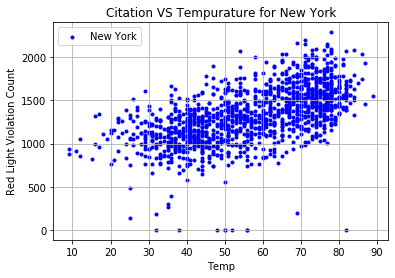

In [25]:
# plot data
plt.scatter(NY_Daily_Weather_2.index, NY_Daily_Weather_2['Daily Count'], label='New York', marker='.', color='b')

# set labels and sticks
plt.title("Citation VS Tempurature for New York")
plt.xlabel("Temp ($^o$F)")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Violation Count for NY.png")
# Show plot
plt.show()

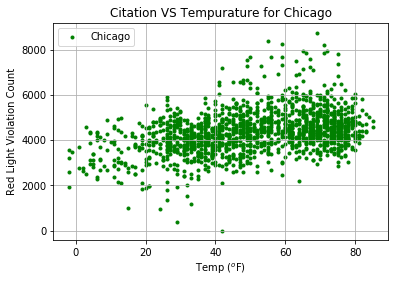

In [29]:
plt.scatter(CHI_Daily_Weather_2.index, CHI_Daily_Weather_2['Daily Total'], label='Chicago', marker='.', color='g' )

# set labels and sticks
plt.title("Citation VS Tempurature for Chicago")
plt.xlabel("Temp ($^o$F)")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Violation Count for CHI.png")
# Show plot
plt.show()

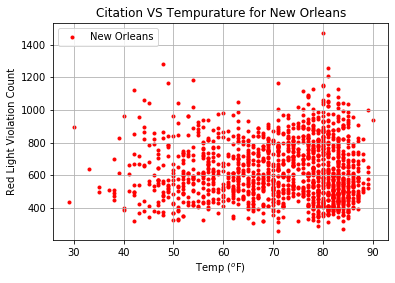

In [28]:
# plot data
plt.scatter(NOLA_Daily_Weather_2.index, NOLA_Daily_Weather_2['Vio_DateTime'], label='New Orleans', marker='.', color='r')

# set labels and sticks
plt.title("Citation VS Tempurature for New Orleans")
plt.xlabel("Temp ($^o$F)")
plt.ylabel("Red Light Violation Count")
# plt.xticks(np.arange(0,26,2))

# plt.style.use('seaborn-bright')
plt.legend()
plt.grid()
plt.savefig("Temp vs Violation Count for NOLA.png")
# Show plot
plt.show()


Section 3.  Traffic vs Violation Count per Hour/Month

In [31]:
# Read traffic csv
chicago_daily_traffic_path = "../Chicago/TrafficHour.csv"
chicago_daily_traffic_df = pd.read_csv(chicago_daily_traffic_path)
chicago_daily_traffic_df.head()

,hour,perTotal,perAvg
0,0,0.965,23.160
1,1,0.663,15.912
2,2,0.545,13.080
3,3,0.537,12.888
4,4,1.028,24.672


In [32]:
chicago_hourcount_df.head()

,hour,Total,Daily Avg,Percent,Percent Avg
0,0,49397,32.519421,0.744670,17.872083
1,1,42034,27.672153,0.633671,15.208113
2,2,37291,24.549704,0.562170,13.492071
3,3,28632,18.849243,0.431633,10.359202
4,4,28327,18.648453,0.427035,10.248851


In [33]:
chicago_daily_traffic_merged = pd.merge(chicago_hourcount_df, chicago_daily_traffic_df, on='hour', how='outer')
chicago_daily_traffic_merged.head()

,hour,Total,Daily Avg,Percent,Percent Avg,perTotal,perAvg
0,0,49397,32.519421,0.744670,17.872083,0.965,23.160
1,1,42034,27.672153,0.633671,15.208113,0.663,15.912
2,2,37291,24.549704,0.562170,13.492071,0.545,13.080
3,3,28632,18.849243,0.431633,10.359202,0.537,12.888
4,4,28327,18.648453,0.427035,10.248851,1.028,24.672


In [34]:
chicago_daily_traffic_merged['Count% / Traffic%'] = (chicago_daily_traffic_merged['Percent']/chicago_daily_traffic_merged['perAvg'])*100
chicago_daily_traffic_merged.head()

,hour,Total,Daily Avg,Percent,Percent Avg,perTotal,perAvg,Count% / Traffic%
0,0,49397,32.519421,0.744670,17.872083,0.965,23.160,3.215329
1,1,42034,27.672153,0.633671,15.208113,0.663,15.912,3.982349
2,2,37291,24.549704,0.562170,13.492071,0.545,13.080,4.297933
3,3,28632,18.849243,0.431633,10.359202,0.537,12.888,3.349111
4,4,28327,18.648453,0.427035,10.248851,1.028,24.672,1.730851


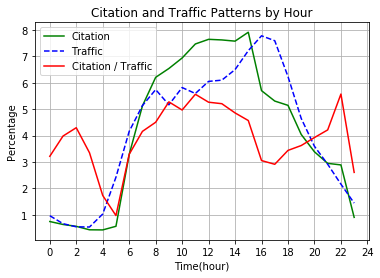

In [43]:
# plot data
plt.plot(chicago_daily_traffic_merged['hour'], 
         chicago_daily_traffic_merged['Percent'],
         label='Citation', color='g', )
plt.plot(chicago_daily_traffic_merged['hour'], 
         chicago_daily_traffic_merged['perTotal'],'--',  
         label='Traffic', color='b')
plt.plot(chicago_daily_traffic_merged['hour'], 
         chicago_daily_traffic_merged['Count% / Traffic%'], 
         label='Citation / Traffic', color='r')
# set labels and sticks
plt.title("Citation and Traffic Patterns by Hour")
plt.xlabel("Time(hour)")
plt.ylabel("Percentage")
plt.xticks(np.arange(0,26,2))

plt.style.use('seaborn-bright')
plt.legend(loc='best')
plt.grid()
plt.savefig("Traffic vs Hour Count.png")
# Show plot
plt.show()

In [38]:
chicago_monthly_traffic_path = "../Chicago/TrafficMonth.csv"
chicago_monthly_traffic_df = pd.read_csv(chicago_monthly_traffic_path)
chicago_monthly_traffic_df.head()

,month,perTotal,perAvg
0,1,7.686083,92.233
1,2,7.759083,93.109
2,3,7.953917,95.447
3,4,8.432750,101.193
4,5,8.733083,104.797


In [39]:
chicago_monthcount_df.head()

,month,Total,Daily Avg,Percent,Percent Avg
0,1,425483,3431.314516,6.560826,78.729909
1,2,410798,3635.380531,6.951009,83.412109
2,3,672227,4336.948387,8.292438,99.509255
3,4,673053,4547.655405,8.695319,104.343830
4,5,652615,5263.024194,10.063136,120.757632


In [40]:
chicago_monthly_traffic_merged = pd.merge(chicago_monthcount_df, chicago_monthly_traffic_df, on='month', how='outer')
chicago_monthly_traffic_merged.head()

chicago_monthly_traffic_merged['Count% / Traffic%'] = (chicago_monthly_traffic_merged['Percent']/chicago_monthly_traffic_merged['perAvg'])*100
chicago_monthly_traffic_merged.head()

,month,Total,Daily Avg,Percent,Percent Avg,perTotal,perAvg,Count% / Traffic%
0,1,425483,3431.314516,6.560826,78.729909,7.686083,92.233,7.113317
1,2,410798,3635.380531,6.951009,83.412109,7.759083,93.109,7.465453
2,3,672227,4336.948387,8.292438,99.509255,7.953917,95.447,8.688003
3,4,673053,4547.655405,8.695319,104.343830,8.432750,101.193,8.592807
4,5,652615,5263.024194,10.063136,120.757632,8.733083,104.797,9.602504


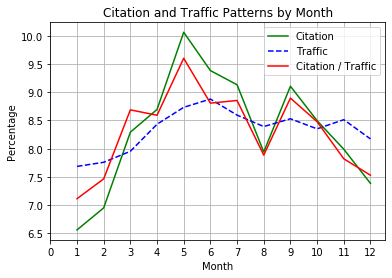

In [45]:
plt.plot(chicago_monthly_traffic_merged['month'], 
         chicago_monthly_traffic_merged['Percent'], 
         label='Citation', color='g')
plt.plot(chicago_monthly_traffic_merged['month'], 
         chicago_monthly_traffic_merged['perTotal'], '--', 
         label='Traffic', color='b')
plt.plot(chicago_monthly_traffic_merged['month'], 
         chicago_monthly_traffic_merged['Count% / Traffic%'], 
         label='Citation / Traffic', color='r')

# set labels and sticks
plt.title("Citation and Traffic Patterns by Month")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.xticks(np.arange(0,13))

plt.style.use('seaborn-bright')
plt.legend(loc='best')
plt.grid()
plt.savefig("Traffic vs Month Count.png")
# Show plot
plt.show()

SECTION 4

In [47]:
CHI_Daily_Weather.head()

,date,Daily Total,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,2014-03-01,3234.0,0.29,3.7,25.0,31.0,11.0,Chicago
1,2014-03-02,2861.0,0.09,1.4,11.0,14.0,1.0,Chicago
2,2014-03-03,3679.0,0.00,0.0,7.0,19.0,-2.0,Chicago
3,2014-03-04,4195.0,0.00,0.1,16.0,27.0,12.0,Chicago
4,2014-03-05,3191.0,0.15,1.7,21.0,23.0,19.0,Chicago


In [48]:
CHI_Daily_SNOW = CHI_Daily_Weather.loc[CHI_Daily_Weather['SNOW'] > 0, :]
CHI_Daily_SNOW.count()

date           116
Daily Total    116
PRCP           116
SNOW           116
TAVG           116
TMAX           116
TMIN           116
city           116
dtype: int64

In [49]:
CHI_Daily_NO_SNOW = CHI_Daily_Weather.loc[CHI_Daily_Weather['SNOW'] == 0, :]
CHI_Daily_NO_SNOW.count()

date           1404
Daily Total    1404
PRCP           1404
SNOW           1404
TAVG           1404
TMAX           1404
TMIN           1404
city           1404
dtype: int64

In [50]:
CHI_Daily_Weather.head()

,date,Daily Total,PRCP,SNOW,TAVG,TMAX,TMIN,city
0,2014-03-01,3234.0,0.29,3.7,25.0,31.0,11.0,Chicago
1,2014-03-02,2861.0,0.09,1.4,11.0,14.0,1.0,Chicago
2,2014-03-03,3679.0,0.00,0.0,7.0,19.0,-2.0,Chicago
3,2014-03-04,4195.0,0.00,0.1,16.0,27.0,12.0,Chicago
4,2014-03-05,3191.0,0.15,1.7,21.0,23.0,19.0,Chicago


In [51]:
CHI_Daily_Weather['If_Snow'] = ['Yes' if CHI_Daily_Weather.loc[i, 'SNOW'] > 0 else 'No' for i in CHI_Daily_Weather.index]
CHI_Daily_Weather.head()

,date,Daily Total,PRCP,SNOW,TAVG,TMAX,TMIN,city,If_Snow
0,2014-03-01,3234.0,0.29,3.7,25.0,31.0,11.0,Chicago,Yes
1,2014-03-02,2861.0,0.09,1.4,11.0,14.0,1.0,Chicago,Yes
2,2014-03-03,3679.0,0.00,0.0,7.0,19.0,-2.0,Chicago,No
3,2014-03-04,4195.0,0.00,0.1,16.0,27.0,12.0,Chicago,Yes
4,2014-03-05,3191.0,0.15,1.7,21.0,23.0,19.0,Chicago,Yes


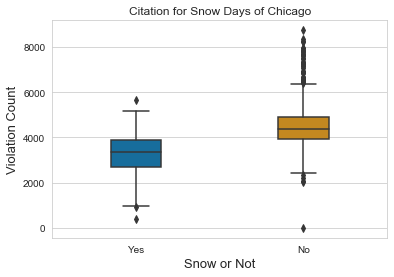

In [60]:
sns.set_style("whitegrid")
sns.boxplot(x = 'If_Snow', 
            y = 'Daily Total', 
            data = CHI_Daily_Weather,
            width=0.3,
            palette="colorblind",
           )
plt.title('Citation for Snow Days of Chicago')
plt.ylabel('Violation Count', fontsize=13)
plt.xlabel('Snow or Not',fontsize=13)

plt.savefig("Boxplot of Snow for Chicago.png")
plt.show()

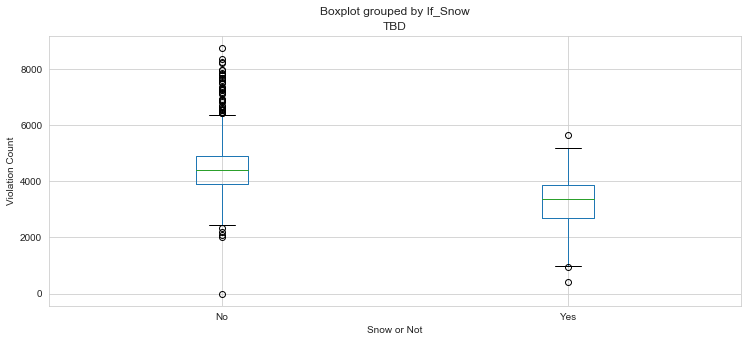

In [134]:
# #boxplot_weather = CHI_Daily_Weather.boxplot(column=['Daily Total'], by='If_Snow', figsize=(12,5))
# #plt.title('TBD')
# #plt.ylabel('Violation Count')
# #plt.xlabel('Snow or Not')
# plt.show()